In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re

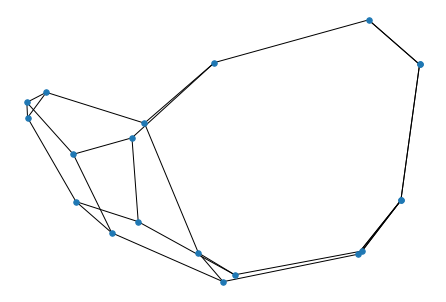

In [3]:
""""
    不同网络类型的模拟生成：
        
        （1）规则图
        （2）ER随机图
        （3）WS小世界网络
        （4）BA无标度网络
"""

###规则图###

#生成包含20个节点、每个节点有3个邻居的规则图RG
RG = nx.random_graphs.random_regular_graph(3,20)
# 定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
pos = nx.spectral_layout(RG)
#绘制规则图的图形，with_labels决定节点是非带标签（编号），node_size是节点的直径
nx.draw(RG,pos,with_labels=False,node_size = 30)
plt.show()  #显示图形

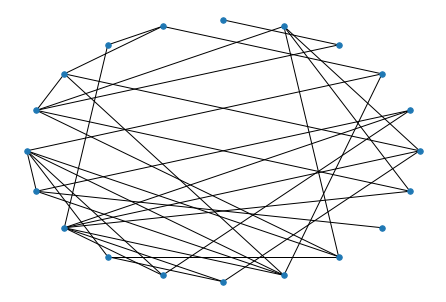

In [4]:
#ER随机图

# 随机生成20个节点，节点间的连接概率都是0.2
ER = nx.random_graphs.erdos_renyi_graph(20,0.2)  #生成包含20个节点、以概率0.2连接的随机图
pos = nx.shell_layout(ER)          #定义一个布局，此处采用了shell布局方式
nx.draw(ER,pos,with_labels=False,node_size = 30)
plt.show()

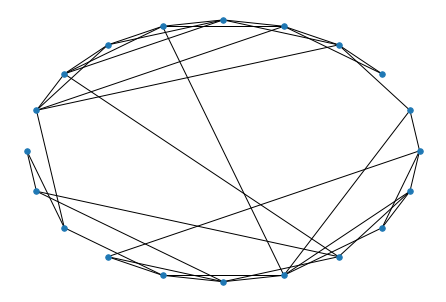

In [5]:
###WS小世界网络###

WS = nx.random_graphs.watts_strogatz_graph(20,4,0.3)  #生成包含20个节点、每个节点4个近邻、随机化重连概率为0.3的小世界网络
pos = nx.circular_layout(WS)          #定义一个布局，此处采用了circular布局方式
nx.draw(WS,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()


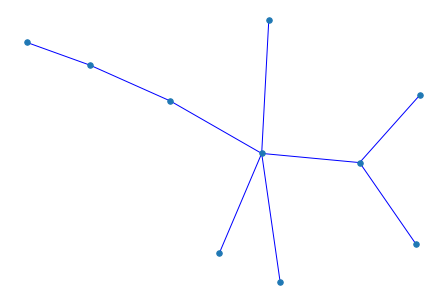

In [6]:
###BA无标度网络###

#BA无标度网络 生成一个含有n个节点、每次加入m条边的BA无标度网络
BA = nx.random_graphs.barabasi_albert_graph(10,1)
pos = nx.spring_layout(BA)
nx.draw(BA, pos, with_labels=False, node_size=30, edge_color='b')
plt.show()


4
2.557894736842105


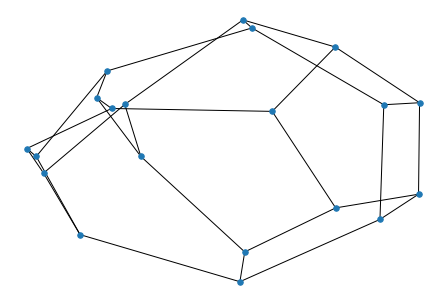

In [7]:
###此处以规则图为例计算网络的各种度量指标###
#生成包含20个节点、每个节点有1个邻居的规则图RG
RG = nx.random_graphs.random_regular_graph(3,20)
#返回图G的直径（最长最短路径的长度
print(nx.diameter(RG))  ###此处要求生成的图是连通图
#则返回图G所有节点间平均最短路径长度。
print(nx.average_shortest_path_length(RG))

pos = nx.spectral_layout(RG)
#绘制规则图的图形，with_labels决定节点是非带标签（编号），node_size是节点的直径
nx.draw(RG,pos,with_labels=False,node_size = 30)
plt.show()  #显示图形

In [8]:


"""
    网络的节点中心性计算：
        （1）度中心性
        （2）紧度中心性
        （3）介度中心性
        （4）pageRank
"""

###度中心性###
###此处以规则图为例计算网络的中心性###
#生成包含20个节点、每个节点有3个邻居的规则图RG,此处为了方便手动计算验证正确性
RG = nx.random_graphs.random_regular_graph(3,8)
print(nx.degree_centrality(RG))

###紧度中心性###
print(nx.closeness_centrality(RG))

###介度中心性###
print(nx.betweenness_centrality(RG))

###pagerank###
print(nx.pagerank(RG))


{1: 0.42857142857142855, 2: 0.42857142857142855, 0: 0.42857142857142855, 4: 0.42857142857142855, 3: 0.42857142857142855, 7: 0.42857142857142855, 5: 0.42857142857142855, 6: 0.42857142857142855}
{1: 0.5833333333333334, 2: 0.5384615384615384, 0: 0.5384615384615384, 4: 0.5833333333333334, 3: 0.5833333333333334, 7: 0.5384615384615384, 5: 0.5833333333333334, 6: 0.5384615384615384}
{1: 0.21428571428571427, 2: 0.047619047619047616, 0: 0.047619047619047616, 4: 0.21428571428571427, 3: 0.21428571428571427, 7: 0.047619047619047616, 5: 0.21428571428571427, 6: 0.047619047619047616}
{1: 0.125, 2: 0.125, 0: 0.125, 4: 0.125, 3: 0.125, 7: 0.125, 5: 0.125, 6: 0.125}


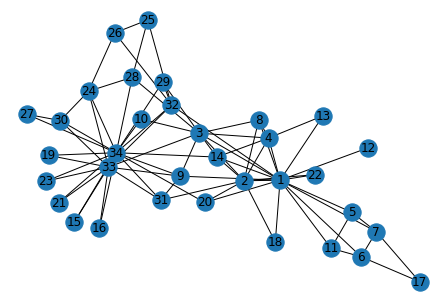

In [9]:
"""
    此处针对两个具体的例子，计算上述指标
"""

G = nx.Graph()

def readNetwork_fengzheng():
    f=open("fengzheng.txt","r").readlines()
    for line in f:
        if line.__len__()>3:
            line=re.sub('"',"",line)
            line=line.strip().split(',')
            G.add_edge(line[0],line[1])

def readNetwork_kongshoudao():
    f = open("kongshoudao.txt", "r").readlines()
    for line in f:
        if line.__len__() > 3:
            line = line.strip().split(',')
            G.add_edge(line[0], line[1])

#readNetwork_fengzheng()
readNetwork_kongshoudao()
nx.draw(G,with_labels=True)
plt.show()